# Imports:

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Classes:

In [65]:
class TrappingRandomWalk:
    """
    the class to simulate the trapping 1d random walk

    the walker randomly goes right with possibility p and left with possibility 1-p
    the walker dies if he goes into traps
    x0 is the start ing point

    methods:
    step:
        the function to randomly do one step left or right using np.random
    getLifeTime:
        the function to get the lifeTime of the walker

    """
    def __init__(self, p: float, x0: int, trap1: int, trap2: int) -> None:
        """
        the function to construct the TrappingRandomWalk object

        :param p: the possibility to go to the right(a number between 0 and 1)
        :type p: float
        :param x0: thr starting point
        :type x0: int
        :param trap1:the left trap
        :type trap1: int
        :param trap2: thr right trap
        :type trap2: int
        """
        self.p = p
        self.x = x0
        self.trap1 = trap1
        self.trap2 = trap2

    def step(self) -> None:
        """
        the function to randomly do one step left or right using np.random
        """
        self.x += 2*(np.random.uniform(0,1)<self.p) -1

    def getLifeTime(self) -> int:
        """
        the function to get the lifeTime of the walker
        while the walker did not fall in trap continue walking and adding to his age

        :return: the lifeTime of the walker
        :rtype: int
        """
        t = 0
        while True:
            if self.x == self.trap1 or self.x == self.trap2: break
            else:
                t +=1
                self.step()

        return t

#### Iterating:

In [66]:
def getMeanLifeTime(p: float, x0: int, trap1: int, trap2: int, iterations: int) -> np.ndarray:
    """
    the function to get the mean lifeTime by iterating and repeating the process in a for loop and performing np.mean

    :param p: the possibility to go to the right(a number between 0 and 1)
    :type p: float
    :param x0: thr starting point
    :type x0: int
    :param trap1:the left trap
    :type trap1: int
    :param trap2: thr right trap
    :type trap2: int
    :param iterations:
    :type iterations:
    :return: the mean of the walkers lifeTime over iterations
    :rtype: int
    """
    lifeTimes = []
    for i in range(iterations):
        trw = TrappingRandomWalk(p,x0,trap1,trap2)
        lifeTimes.append(trw.getLifeTime())

    return np.mean(lifeTimes)

#### Plotting:

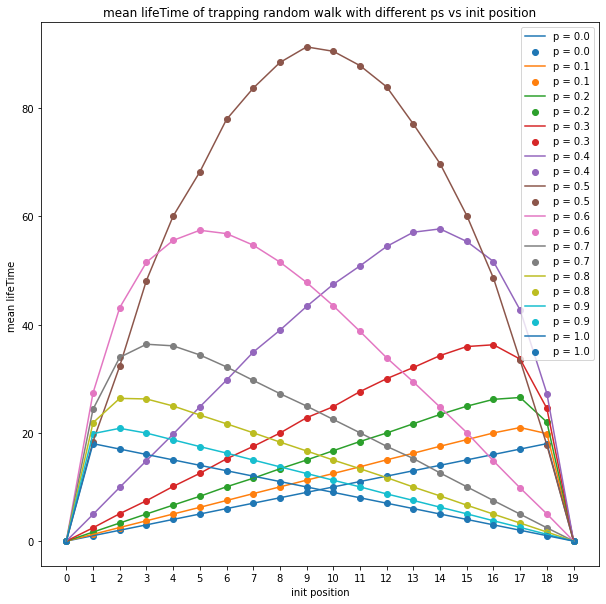

In [76]:
plt.figure(figsize=(10,10))
plt.title("mean lifeTime of trapping random walk with different ps vs init position")
plt.xlabel("init position")
plt.ylabel("mean lifeTime ")
plt.xticks(np.arange(20))
for p in np.arange(11)/10:
    data = []
    for i in range(20):
        data.append(getMeanLifeTime(p,i,0,19,10000))
    plt.plot(np.arange(20),data)
    plt.scatter(np.arange(20),data)
plt.legend(["p = 0.0","p = 0.0","p = 0.1","p = 0.1","p = 0.2","p = 0.2","p = 0.3","p = 0.3","p = 0.4","p = 0.4","p = 0.5","p = 0.5","p = 0.6","p = 0.6","p = 0.7","p = 0.7","p = 0.8","p = 0.8","p = 0.9","p = 0.9","p = 1.0","p = 1.0"])
plt.show()